In [23]:
import matplotlib.pyplot as plt 
import numpy as np 
import random as rd
import networkx as nx
from random import uniform,seed
from random import sample
import pandas as pd
import time
from pylab import *

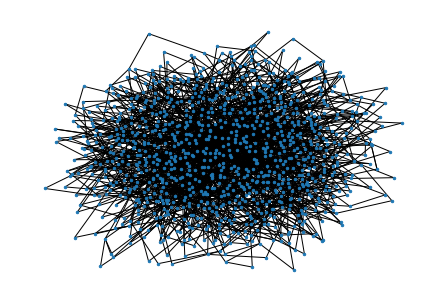

In [24]:
BA_Graph=nx.barabasi_albert_graph(1009,2)
nx.draw(BA_Graph,node_size=6)

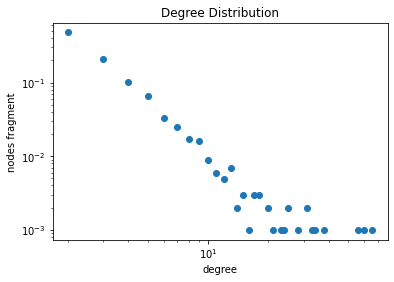

In [ ]:
#Degree distribution of Graph 
degree1=dict(BA_Graph.degree())
value_of_degree=sorted(set(degree1.values()))
H=[list(degree1.values()).count(i)/float(nx.number_of_nodes(BA_Graph))for i in value_of_degree]
plt.plot(value_of_degree,H,'o')
plt.title('Degree Distribution')
plt.xlabel('degree')
plt.ylabel('nodes fragment')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [36]:
def Ind_Cas(Barabasi_Graph,Seed_set,Prob,Simulations):
  i=0
  j=0
  while i< Simulations:
    coming_node,final_ans=Seed_set[:],Seed_set[:]
    M=[]
    for j in coming_node:
      np.random.seed(i)                                        #Finding any node of next_node can be activated then add them to coming_node1
      goal=next_node(Barabasi_Graph,Prob,coming_node)          #finding next_node node of coming_node
      m=len(goal)
                                       
      S=np.random.uniform(0,1,m)<Prob
      coming_node1=list(np.extract(S,sorted(goal)))
      coming_node=(set(coming_node1)-set(final_ans))                 #checking Duplicate nodes and removing them
      com=list(coming_node)
      final_ans=final_ans+com
    M.append(len(final_ans))
  return(M)  
  #return(np.mean(M))


In [37]:
#Finding neighbour node function 
def next_node(BA_Graph,p,coming_node):
    goal = []
    for node in coming_node:
        goal += BA_Graph.neighbors(node)
    
    return(goal)

In [38]:
#randomly selecting 15 nodes........
S=rd.sample(list(BA_Graph.nodes), 15)
print(S)

[313, 740, 737, 688, 132, 573, 259, 823, 432, 126, 931, 982, 934, 397, 612]


In [39]:

S=rd.sample(list(BA_Graph.nodes),15)#selecting rendom 15 seeds
#calling ICM_Cas for finding the all activated node  
result=Ind_Cas(BA_Graph,S,0.06,1000) #prob in between 0.5 and 0.15 
#Printing all activated node
print(result)

[17]


In [ ]:
def Greedy_on_ICM(BA_Graph,k,prob=0.05,simulation=1000):
    Q,spr, timelap, begin_time = [], [], [], time.time()
     
    
    # Find k nodes with largest marginal gain
    for _ in range(k):

        # Loop over nodes that are not yet in seed set to find biggest marginal gain
        B_spr = 0
        j=0
        while j<set(range(BA_Graph.number_of_nodes()))-set(Q):

            # Get the spread
            s = Ind_Cas(BA_Graph,Q + [j],prob,simulation)
            
            # Updatting the winning node 

            if s > B_spr:
                B_spr, node = s, j

        # Adding the selected node to the seed_set
        S.append(node)
        
        # Adding estimated spread and elapsed_time
        spr.append(B_spr)
        timelap.append(time.time() - begin_time)

    return(Q,spr,timelap)

In [ ]:
greedy_on_icm = greedy(BA_Graph,2,0.05,mc=  1000)
#Greedy on ICM result
print(greedy_on_icm)

([0, 8], [31.0, 52.0], [137.80646657943726, 359.1844780445099])


In [ ]:
#implementing Linear threshold model for BA graph
def LT_Model(BA_Graph, pl, limit):
	lists = pl[:]
	V = {}
  i=0
	j=0
	while i<BA_Graph.nodes():
		V[i] = random()
	for t in range(limit):
		list1 = lists[:]
		while j<BA_Graph.nodes():
			W = 0
			if BA_Graph.degree()[j]:
				w = 1/float(BA_Graph.degree()[j])
			else:
				continue
			for h in BA_Graph.neighbors(j):
				if h in lists:
					W = W + w
			if W > V[j]:
				lists.append(j)
		if set(list1) == set(lists):
			break
			#returns all the activated nodes in the diffusion process
	return lists 


In [ ]:
#randomly selecting 15 nodes
s=rd.sample(list(BA_Graph.nodes), 15)
S=LT_Model(BA_Graph,s,2)
#output of activated node in the diffusion process 
print(S)

[683, 385, 231, 76, 776, 854, 602, 635, 333, 845, 98, 113, 171, 309, 262, 98, 122, 150, 151, 170, 204, 217, 324, 328, 333, 378, 451, 496, 504, 558, 563, 606, 635, 651, 663, 785, 789, 840, 871, 898, 994, 40, 76, 98, 122, 150, 151, 170, 204, 217, 231, 324, 328, 333, 354, 378, 451, 496, 504, 558, 563, 606, 635, 641, 651, 663, 785, 789, 840, 871, 898, 994]


In [ ]:
def Greedy_on_LTM(BA_Graph,k,simulation=1000):
    Q,spr, timelap, begin_time = [], [], [], time.time()
     
    
    # Find k nodes with largest marginal gain
    for _ in range(k):

        # Loop over nodes that are not yet in seed set to find biggest marginal gain
        B_spr = 0
        j=0
        while j<set(range(BA_Graph.number_of_nodes()))-set(Q):

            # Get the spread
            s = Ind_Cas(BA_Graph,Q + [j],simulation)
            
            # Updatting the winning node 

            if s > B_spr:
                B_spr, node = s, j

        # Adding the selected node to the seed_set
        S.append(node)
        
        # Adding estimated spread and elapsed_time
        spr.append(B_spr)
        timelap.append(time.time() - begin_time)

    return(Q,spr,timelap)

In [ ]:
greedy_on_ltm = greedy(BA_Graph,2,simulation=  1000)
#Greedy on ICM result
print(greedy_on_ltm)

([27, 936], [198.0, 242.0], [459.0046863555908, 1120.5336980819702])
